In [ ]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 35.0 MB/s eta 0:00:00


In [ ]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy.control import Antecedent, Consequent, Rule, ControlSystem, ControlSystemSimulation

# Định nghĩa biến mờ cho Tài Chính
thu_nhap = Antecedent(np.arange(0, 31, 1), 'thu_nhap')  # Triệu VND
thoi_gian = Antecedent(np.arange(0, 11, 1), 'thoi_gian')  # Năm
chi_tieu = Antecedent(np.arange(0, 31, 1), 'chi_tieu')  # Triệu VND
no = Antecedent(np.arange(0, 301, 1), 'no')  # Triệu VND
xep_hang_tai_chinh = Consequent(np.arange(0, 101, 1), 'xep_hang_tai_chinh')

# Hàm thành viên cho Thu nhập

thu_nhap['thap'] = fuzz.trapmf(thu_nhap.universe, [0, 0, 10, 17])  # Mở rộng phạm vi đến 17
thu_nhap['trung_binh'] = fuzz.trimf(thu_nhap.universe, [12, 20, 27])  # Bao phủ thêm
thu_nhap['cao'] = fuzz.trapmf(thu_nhap.universe, [22, 25, 30, 30])

# Hàm thành viên cho Thời gian làm việc
thoi_gian['ngan'] = fuzz.trapmf(thoi_gian.universe, [0, 0, 3, 7])
thoi_gian['trung_binh'] = fuzz.trimf(thoi_gian.universe, [3, 5, 7])
thoi_gian['dai'] = fuzz.trapmf(thoi_gian.universe, [7, 8, 10, 10])

# Hàm thành viên cho Chi tiêu
chi_tieu['thap'] = fuzz.trapmf(chi_tieu.universe, [0, 0, 8, 18])
chi_tieu['trung_binh'] = fuzz.trimf(chi_tieu.universe, [8, 13, 18])
chi_tieu['cao'] = fuzz.trapmf(chi_tieu.universe, [18, 22, 30, 30])

# Hàm thành viên cho Nợ
no['thap'] = fuzz.trapmf(no.universe, [0, 0, 70, 250])
no['trung_binh'] = fuzz.trimf(no.universe, [70, 150, 250])
no['cao'] = fuzz.trapmf(no.universe, [250, 275, 300, 300])

# Hàm thành viên cho Xếp hạng tài chính
xep_hang_tai_chinh['thap'] = fuzz.trimf(xep_hang_tai_chinh.universe, [0, 0, 33])
xep_hang_tai_chinh['trung_binh'] = fuzz.trimf(xep_hang_tai_chinh.universe, [33, 50, 67])
xep_hang_tai_chinh['tot'] = fuzz.trimf(xep_hang_tai_chinh.universe, [67, 100, 100])



# Quy tắc cho Tài Chính
# Quy tắc mờ
# Thu nhập thấp
rule_tc1 = Rule(thu_nhap['thap'] & thoi_gian['ngan'] & chi_tieu['thap'] & no['thap'], xep_hang_tai_chinh['thap'])
rule_tc2 = Rule(thu_nhap['thap'] & thoi_gian['ngan'] & chi_tieu['thap'] & no['trung_binh'], xep_hang_tai_chinh['thap'])
rule_tc3 = Rule(thu_nhap['thap'] & thoi_gian['ngan'] & chi_tieu['thap'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc4 = Rule(thu_nhap['thap'] & thoi_gian['ngan'] & chi_tieu['trung_binh'] & no['thap'], xep_hang_tai_chinh['thap'])
rule_tc5 = Rule(thu_nhap['thap'] & thoi_gian['ngan'] & chi_tieu['trung_binh'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc6 = Rule(thu_nhap['thap'] & thoi_gian['ngan'] & chi_tieu['trung_binh'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc7 = Rule(thu_nhap['thap'] & thoi_gian['ngan'] & chi_tieu['cao'] & no['thap'], xep_hang_tai_chinh['thap'])
rule_tc8 = Rule(thu_nhap['thap'] & thoi_gian['ngan'] & chi_tieu['cao'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc9 = Rule(thu_nhap['thap'] & thoi_gian['ngan'] & chi_tieu['cao'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

# Thu nhập trung bình
rule_tc10 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['thap'] & no['thap'], xep_hang_tai_chinh['trung_binh'])
rule_tc11 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['thap'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc12 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['thap'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc13 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['trung_binh'] & no['thap'], xep_hang_tai_chinh['trung_binh'])
rule_tc14 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['trung_binh'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc15 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['trung_binh'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc16 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['cao'] & no['thap'], xep_hang_tai_chinh['trung_binh'])
rule_tc17 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['cao'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc18 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['cao'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

# Thu nhập cao
rule_tc19 = Rule(thu_nhap['cao'] & thoi_gian['dai'] & chi_tieu['thap'] & no['thap'], xep_hang_tai_chinh['tot'])
rule_tc20 = Rule(thu_nhap['cao'] & thoi_gian['dai'] & chi_tieu['thap'] & no['trung_binh'], xep_hang_tai_chinh['tot'])
rule_tc21 = Rule(thu_nhap['cao'] & thoi_gian['dai'] & chi_tieu['thap'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc22 = Rule(thu_nhap['cao'] & thoi_gian['dai'] & chi_tieu['trung_binh'] & no['thap'], xep_hang_tai_chinh['tot'])
rule_tc23 = Rule(thu_nhap['cao'] & thoi_gian['dai'] & chi_tieu['trung_binh'] & no['trung_binh'], xep_hang_tai_chinh['tot'])
rule_tc24 = Rule(thu_nhap['cao'] & thoi_gian['dai'] & chi_tieu['trung_binh'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc25 = Rule(thu_nhap['cao'] & thoi_gian['dai'] & chi_tieu['cao'] & no['thap'], xep_hang_tai_chinh['trung_binh'])
rule_tc26 = Rule(thu_nhap['cao'] & thoi_gian['dai'] & chi_tieu['cao'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc27 = Rule(thu_nhap['cao'] & thoi_gian['dai'] & chi_tieu['cao'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

# Tiếp tục mở rộng với các tổ hợp còn lại
rule_tc28 = Rule(thu_nhap['thap'] & thoi_gian['trung_binh'] & chi_tieu['thap'] & no['thap'], xep_hang_tai_chinh['thap'])
rule_tc29 = Rule(thu_nhap['thap'] & thoi_gian['trung_binh'] & chi_tieu['thap'] & no['trung_binh'], xep_hang_tai_chinh['thap'])
rule_tc30 = Rule(thu_nhap['thap'] & thoi_gian['trung_binh'] & chi_tieu['thap'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc31 = Rule(thu_nhap['thap'] & thoi_gian['trung_binh'] & chi_tieu['trung_binh'] & no['thap'], xep_hang_tai_chinh['thap'])
rule_tc32 = Rule(thu_nhap['thap'] & thoi_gian['trung_binh'] & chi_tieu['trung_binh'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc33 = Rule(thu_nhap['thap'] & thoi_gian['trung_binh'] & chi_tieu['trung_binh'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc34 = Rule(thu_nhap['thap'] & thoi_gian['trung_binh'] & chi_tieu['cao'] & no['thap'], xep_hang_tai_chinh['thap'])
rule_tc35 = Rule(thu_nhap['thap'] & thoi_gian['trung_binh'] & chi_tieu['cao'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc36 = Rule(thu_nhap['thap'] & thoi_gian['trung_binh'] & chi_tieu['cao'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc37 = Rule(thu_nhap['thap'] & thoi_gian['dai'] & chi_tieu['thap'] & no['thap'], xep_hang_tai_chinh['thap'])
rule_tc38 = Rule(thu_nhap['thap'] & thoi_gian['dai'] & chi_tieu['thap'] & no['trung_binh'], xep_hang_tai_chinh['thap'])
rule_tc39 = Rule(thu_nhap['thap'] & thoi_gian['dai'] & chi_tieu['thap'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc40 = Rule(thu_nhap['thap'] & thoi_gian['dai'] & chi_tieu['trung_binh'] & no['thap'], xep_hang_tai_chinh['thap'])
rule_tc41 = Rule(thu_nhap['thap'] & thoi_gian['dai'] & chi_tieu['trung_binh'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc42 = Rule(thu_nhap['thap'] & thoi_gian['dai'] & chi_tieu['trung_binh'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc43 = Rule(thu_nhap['thap'] & thoi_gian['dai'] & chi_tieu['cao'] & no['thap'], xep_hang_tai_chinh['thap'])
rule_tc44 = Rule(thu_nhap['thap'] & thoi_gian['dai'] & chi_tieu['cao'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc45 = Rule(thu_nhap['thap'] & thoi_gian['dai'] & chi_tieu['cao'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc46 = Rule(thu_nhap['trung_binh'] & thoi_gian['ngan'] & chi_tieu['thap'] & no['thap'], xep_hang_tai_chinh['trung_binh'])
rule_tc47 = Rule(thu_nhap['trung_binh'] & thoi_gian['ngan'] & chi_tieu['thap'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc48 = Rule(thu_nhap['trung_binh'] & thoi_gian['ngan'] & chi_tieu['thap'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc49 = Rule(thu_nhap['trung_binh'] & thoi_gian['ngan'] & chi_tieu['trung_binh'] & no['thap'], xep_hang_tai_chinh['trung_binh'])
rule_tc50 = Rule(thu_nhap['trung_binh'] & thoi_gian['ngan'] & chi_tieu['trung_binh'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc51 = Rule(thu_nhap['trung_binh'] & thoi_gian['ngan'] & chi_tieu['trung_binh'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc52 = Rule(thu_nhap['trung_binh'] & thoi_gian['ngan'] & chi_tieu['cao'] & no['thap'], xep_hang_tai_chinh['trung_binh'])
rule_tc53 = Rule(thu_nhap['trung_binh'] & thoi_gian['ngan'] & chi_tieu['cao'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc54 = Rule(thu_nhap['trung_binh'] & thoi_gian['ngan'] & chi_tieu['cao'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc55 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['thap'] & no['thap'], xep_hang_tai_chinh['trung_binh'])
rule_tc56 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['thap'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc57 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['thap'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc58 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['trung_binh'] & no['thap'], xep_hang_tai_chinh['trung_binh'])
rule_tc59 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['trung_binh'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc60 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['trung_binh'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc61 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['cao'] & no['thap'], xep_hang_tai_chinh['trung_binh'])
rule_tc62 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['cao'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc63 = Rule(thu_nhap['trung_binh'] & thoi_gian['trung_binh'] & chi_tieu['cao'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc64 = Rule(thu_nhap['trung_binh'] & thoi_gian['dai'] & chi_tieu['thap'] & no['thap'], xep_hang_tai_chinh['trung_binh'])
rule_tc65 = Rule(thu_nhap['trung_binh'] & thoi_gian['dai'] & chi_tieu['thap'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc66 = Rule(thu_nhap['trung_binh'] & thoi_gian['dai'] & chi_tieu['thap'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc67 = Rule(thu_nhap['trung_binh'] & thoi_gian['dai'] & chi_tieu['trung_binh'] & no['thap'], xep_hang_tai_chinh['trung_binh'])
rule_tc68 = Rule(thu_nhap['trung_binh'] & thoi_gian['dai'] & chi_tieu['trung_binh'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc69 = Rule(thu_nhap['trung_binh'] & thoi_gian['dai'] & chi_tieu['trung_binh'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc70 = Rule(thu_nhap['trung_binh'] & thoi_gian['dai'] & chi_tieu['cao'] & no['thap'], xep_hang_tai_chinh['trung_binh'])
rule_tc71 = Rule(thu_nhap['trung_binh'] & thoi_gian['dai'] & chi_tieu['cao'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc72 = Rule(thu_nhap['trung_binh'] & thoi_gian['dai'] & chi_tieu['cao'] & no['cao'], xep_hang_tai_chinh['trung_binh'])
rule_tc73 = Rule(thu_nhap['cao'] & thoi_gian['ngan'] & chi_tieu['thap'] & no['thap'], xep_hang_tai_chinh['trung_binh'])
rule_tc74 = Rule(thu_nhap['cao'] & thoi_gian['ngan'] & chi_tieu['thap'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc75 = Rule(thu_nhap['cao'] & thoi_gian['ngan'] & chi_tieu['thap'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc76 = Rule(thu_nhap['cao'] & thoi_gian['ngan'] & chi_tieu['trung_binh'] & no['thap'], xep_hang_tai_chinh['trung_binh'])
rule_tc77 = Rule(thu_nhap['cao'] & thoi_gian['ngan'] & chi_tieu['trung_binh'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc78 = Rule(thu_nhap['cao'] & thoi_gian['ngan'] & chi_tieu['trung_binh'] & no['cao'], xep_hang_tai_chinh['trung_binh'])

rule_tc79 = Rule(thu_nhap['cao'] & thoi_gian['ngan'] & chi_tieu['cao'] & no['thap'], xep_hang_tai_chinh['trung_binh'])
rule_tc80 = Rule(thu_nhap['cao'] & thoi_gian['ngan'] & chi_tieu['cao'] & no['trung_binh'], xep_hang_tai_chinh['trung_binh'])
rule_tc81 = Rule(thu_nhap['cao'] & thoi_gian['ngan'] & chi_tieu['cao'] & no['cao'], xep_hang_tai_chinh['tot'])



# Hệ thống mờ cho Tài Chính
# Hệ thống điều khiển mờ
# Tạo danh sách chứa tất cả các luật
all_rules = [
    rule_tc1, rule_tc2, rule_tc3, rule_tc4, rule_tc5, rule_tc6, rule_tc7,
    rule_tc8, rule_tc9, rule_tc10, rule_tc11, rule_tc12, rule_tc13, rule_tc14,
    rule_tc15, rule_tc16, rule_tc17, rule_tc18, rule_tc19, rule_tc20, rule_tc21,
    rule_tc22, rule_tc23, rule_tc24, rule_tc25, rule_tc26, rule_tc27, rule_tc28,
    rule_tc29, rule_tc30, rule_tc31, rule_tc32, rule_tc33, rule_tc34, rule_tc35,
    rule_tc36, rule_tc37, rule_tc38, rule_tc39, rule_tc40, rule_tc41, rule_tc42,
    rule_tc43, rule_tc44, rule_tc45, rule_tc46, rule_tc47, rule_tc48, rule_tc49,
    rule_tc50, rule_tc51, rule_tc52, rule_tc53, rule_tc54, rule_tc55, rule_tc56,
    rule_tc57, rule_tc58, rule_tc59, rule_tc60, rule_tc61, rule_tc62, rule_tc63,
    rule_tc64, rule_tc65, rule_tc66, rule_tc67, rule_tc68, rule_tc69, rule_tc70,
    rule_tc71, rule_tc72, rule_tc73, rule_tc74, rule_tc75, rule_tc76, rule_tc77,
    rule_tc78, rule_tc79, rule_tc80, rule_tc81
]

# Tạo hệ thống điều khiển từ tất cả các luật
tc_control = ControlSystem(all_rules)

# Tạo mô phỏng cho hệ thống điều khiển
tc_simulation = ControlSystemSimulation(tc_control)



In [ ]:
# Giá trị tài sản xe
xep_hang_tai_san = Consequent(np.arange(0, 101, 1), 'xep_hang_tai_san')
# Universe cho giá trị xe
gia_tri_xe = Antecedent(np.arange(0, 1001, 1), 'gia_tri_xe')
gia_tri_xe['thap'] = fuzz.trapmf(gia_tri_xe.universe, [0, 0, 200, 600])
gia_tri_xe['trung_binh'] = fuzz.trimf(gia_tri_xe.universe, [200, 400, 600])
gia_tri_xe['cao'] = fuzz.trapmf(gia_tri_xe.universe, [600, 700, 1000, 1000])

# Universe cho giá trị nhà ở
gia_tri_nha = Antecedent(np.arange(0, 2001, 1), 'gia_tri_nha')
gia_tri_nha['thap'] = fuzz.trapmf(gia_tri_nha.universe, [0, 0, 700, 1500])
gia_tri_nha['trung_binh'] = fuzz.trimf(gia_tri_nha.universe, [700, 1100, 1500])
gia_tri_nha['cao'] = fuzz.trapmf(gia_tri_nha.universe, [1500, 1700, 2000, 2000])

# Universe cho tài sản khác
tai_san_khac = Antecedent(np.arange(0, 1001, 1), 'tai_san_khac')
tai_san_khac['thap'] = fuzz.trapmf(tai_san_khac.universe, [0, 0, 200, 700])
tai_san_khac['trung_binh'] = fuzz.trimf(tai_san_khac.universe, [200, 450, 700])
tai_san_khac['cao'] = fuzz.trapmf(tai_san_khac.universe, [700, 800, 1000, 1000])

# Universe cho xếp hạng tài sản đảm bảo
xep_hang_tai_san = Consequent(np.arange(0, 101, 1), 'xep_hang_tai_san')
xep_hang_tai_san['thap'] = fuzz.trimf(xep_hang_tai_san.universe, [0, 0, 33])
xep_hang_tai_san['trung_binh'] = fuzz.trimf(xep_hang_tai_san.universe, [33, 50, 67])
xep_hang_tai_san['tot'] = fuzz.trimf(xep_hang_tai_san.universe, [67, 100, 100])


# Quy tắc mờ
from skfuzzy.control import Rule

# 27 luật bao phủ mọi tổ hợp của (gia_tri_xe, gia_tri_nha, tai_san_khac)
rule_ts1 = Rule(gia_tri_xe['thap'] & gia_tri_nha['thap'] & tai_san_khac['thap'], xep_hang_tai_san['thap'])
rule_ts2 = Rule(gia_tri_xe['thap'] & gia_tri_nha['thap'] & tai_san_khac['trung_binh'], xep_hang_tai_san['thap'])
rule_ts3 = Rule(gia_tri_xe['thap'] & gia_tri_nha['thap'] & tai_san_khac['cao'], xep_hang_tai_san['trung_binh'])

rule_ts4 = Rule(gia_tri_xe['thap'] & gia_tri_nha['trung_binh'] & tai_san_khac['thap'], xep_hang_tai_san['thap'])
rule_ts5 = Rule(gia_tri_xe['thap'] & gia_tri_nha['trung_binh'] & tai_san_khac['trung_binh'], xep_hang_tai_san['trung_binh'])
rule_ts6 = Rule(gia_tri_xe['thap'] & gia_tri_nha['trung_binh'] & tai_san_khac['cao'], xep_hang_tai_san['trung_binh'])

rule_ts7 = Rule(gia_tri_xe['thap'] & gia_tri_nha['cao'] & tai_san_khac['thap'], xep_hang_tai_san['trung_binh'])
rule_ts8 = Rule(gia_tri_xe['thap'] & gia_tri_nha['cao'] & tai_san_khac['trung_binh'], xep_hang_tai_san['trung_binh'])
rule_ts9 = Rule(gia_tri_xe['thap'] & gia_tri_nha['cao'] & tai_san_khac['cao'], xep_hang_tai_san['trung_binh'])

rule_ts10 = Rule(gia_tri_xe['trung_binh'] & gia_tri_nha['thap'] & tai_san_khac['thap'], xep_hang_tai_san['thap'])
rule_ts11 = Rule(gia_tri_xe['trung_binh'] & gia_tri_nha['thap'] & tai_san_khac['trung_binh'], xep_hang_tai_san['trung_binh'])
rule_ts12 = Rule(gia_tri_xe['trung_binh'] & gia_tri_nha['thap'] & tai_san_khac['cao'], xep_hang_tai_san['trung_binh'])

rule_ts13 = Rule(gia_tri_xe['trung_binh'] & gia_tri_nha['trung_binh'] & tai_san_khac['thap'], xep_hang_tai_san['trung_binh'])
rule_ts14 = Rule(gia_tri_xe['trung_binh'] & gia_tri_nha['trung_binh'] & tai_san_khac['trung_binh'], xep_hang_tai_san['trung_binh'])
rule_ts15 = Rule(gia_tri_xe['trung_binh'] & gia_tri_nha['trung_binh'] & tai_san_khac['cao'], xep_hang_tai_san['tot'])

rule_ts16 = Rule(gia_tri_xe['trung_binh'] & gia_tri_nha['cao'] & tai_san_khac['thap'], xep_hang_tai_san['trung_binh'])
rule_ts17 = Rule(gia_tri_xe['trung_binh'] & gia_tri_nha['cao'] & tai_san_khac['trung_binh'], xep_hang_tai_san['tot'])
rule_ts18 = Rule(gia_tri_xe['trung_binh'] & gia_tri_nha['cao'] & tai_san_khac['cao'], xep_hang_tai_san['tot'])

rule_ts19 = Rule(gia_tri_xe['cao'] & gia_tri_nha['thap'] & tai_san_khac['thap'], xep_hang_tai_san['trung_binh'])
rule_ts20 = Rule(gia_tri_xe['cao'] & gia_tri_nha['thap'] & tai_san_khac['trung_binh'], xep_hang_tai_san['trung_binh'])
rule_ts21 = Rule(gia_tri_xe['cao'] & gia_tri_nha['thap'] & tai_san_khac['cao'], xep_hang_tai_san['trung_binh'])

rule_ts22 = Rule(gia_tri_xe['cao'] & gia_tri_nha['trung_binh'] & tai_san_khac['thap'], xep_hang_tai_san['trung_binh'])
rule_ts23 = Rule(gia_tri_xe['cao'] & gia_tri_nha['trung_binh'] & tai_san_khac['trung_binh'], xep_hang_tai_san['tot'])
rule_ts24 = Rule(gia_tri_xe['cao'] & gia_tri_nha['trung_binh'] & tai_san_khac['cao'], xep_hang_tai_san['tot'])

rule_ts25 = Rule(gia_tri_xe['cao'] & gia_tri_nha['cao'] & tai_san_khac['thap'], xep_hang_tai_san['tot'])
rule_ts26 = Rule(gia_tri_xe['cao'] & gia_tri_nha['cao'] & tai_san_khac['trung_binh'], xep_hang_tai_san['tot'])
rule_ts27 = Rule(gia_tri_xe['cao'] & gia_tri_nha['cao'] & tai_san_khac['cao'], xep_hang_tai_san['tot'])



# Hệ thống điều khiển mờ
ts_control = ControlSystem([rule_ts1, rule_ts2, rule_ts3, rule_ts4, rule_ts5,
                            rule_ts6, rule_ts7, rule_ts8, rule_ts9, rule_ts10, rule_ts11])
ts_simulation = ControlSystemSimulation(ts_control)


In [ ]:
# Xếp hạng tài sản đảm bảo
tai_san = Antecedent(np.arange(0, 101, 1), 'tai_san')
tai_san['thap'] = fuzz.trimf(tai_san.universe, [0, 0, 33])
tai_san['trung_binh'] = fuzz.trimf(tai_san.universe, [33, 50, 67])
tai_san['tot'] = fuzz.trimf(tai_san.universe, [67, 100, 100])

# Xếp hạng tài chính
tai_chinh = Antecedent(np.arange(0, 101, 1), 'tai_chinh')
tai_chinh['thap'] = fuzz.trimf(tai_chinh.universe, [0, 0, 33])
tai_chinh['trung_binh'] = fuzz.trimf(tai_chinh.universe, [33, 50, 67])
tai_chinh['tot'] = fuzz.trimf(tai_chinh.universe, [67, 100, 100])

# Xếp hạng tài chính cá nhân
xep_hang_cuoi = Consequent(np.arange(0, 101, 1), 'xep_hang_cuoi')
xep_hang_cuoi['thap'] = fuzz.trimf(xep_hang_cuoi.universe, [0, 0, 33])
xep_hang_cuoi['trung_binh'] = fuzz.trimf(xep_hang_cuoi.universe, [33, 50, 67])
xep_hang_cuoi['tot'] = fuzz.trimf(xep_hang_cuoi.universe, [67, 100, 100])


# Quy tắc cho nhóm tổng hợp
# Quy tắc mờ cho xếp hạng tài chính cá nhân
rule_final1 = Rule(tai_san['thap'] & tai_chinh['thap'], xep_hang_cuoi['thap'])
rule_final2 = Rule(tai_san['thap'] & tai_chinh['trung_binh'], xep_hang_cuoi['thap'])
rule_final3 = Rule(tai_san['thap'] & tai_chinh['tot'], xep_hang_cuoi['trung_binh'])
rule_final4 = Rule(tai_san['trung_binh'] & tai_chinh['thap'], xep_hang_cuoi['thap'])
rule_final5 = Rule(tai_san['trung_binh'] & tai_chinh['trung_binh'], xep_hang_cuoi['trung_binh'])
rule_final6 = Rule(tai_san['trung_binh'] & tai_chinh['tot'], xep_hang_cuoi['tot'])
rule_final7 = Rule(tai_san['tot'] & tai_chinh['thap'], xep_hang_cuoi['trung_binh'])
rule_final8 = Rule(tai_san['tot'] & tai_chinh['trung_binh'], xep_hang_cuoi['tot'])
rule_final9 = Rule(tai_san['tot'] & tai_chinh['tot'], xep_hang_cuoi['tot'])

# Hệ thống điều khiển mờ
final_control = ControlSystem([rule_final1, rule_final2, rule_final3, rule_final4, rule_final5, rule_final6, rule_final7, rule_final8, rule_final9])
final_simulation = ControlSystemSimulation(final_control)




In [ ]:
def interpret_rank(value):
    """Chuyển giá trị thành mô tả chữ."""
    if value <= 33:
        return "Thấp"
    elif value <= 67:
        return "Trung bình"
    else:
        return "Tốt"

In [ ]:
# Đầu vào tài chính
tc_simulation.input['thu_nhap'] = 28  # Cao
tc_simulation.input['thoi_gian'] = 8  # Dài
tc_simulation.input['chi_tieu'] = 10  # Thấp
tc_simulation.input['no'] = 50  # Thấp
tc_simulation.compute()

# Đầu vào tài sản đảm bảo
ts_simulation.input['gia_tri_xe'] = 300  # Thấp
ts_simulation.input['gia_tri_nha'] = 400  # Trung bình
ts_simulation.input['tai_san_khac'] = 900  # Cao
ts_simulation.compute()

# Đầu vào xếp hạng tổng hợp
final_simulation.input['tai_chinh'] = tc_simulation.output['xep_hang_tai_chinh']
final_simulation.input['tai_san'] = ts_simulation.output['xep_hang_tai_san']
final_simulation.compute()

# Hiển thị kết quả
xep_hang_tai_chinh_value = tc_simulation.output['xep_hang_tai_chinh']
xep_hang_tai_san_value = ts_simulation.output['xep_hang_tai_san']
xep_hang_cuoi_value = final_simulation.output['xep_hang_cuoi']

print(f"Xếp hạng tài chính: {xep_hang_tai_chinh_value:.2f} ({interpret_rank(xep_hang_tai_chinh_value)})")
print(f"Xếp hạng tài sản: {xep_hang_tai_san_value:.2f} ({interpret_rank(xep_hang_tai_san_value)})")
print(f"==> Xếp hạng tài chính cá nhân: {xep_hang_cuoi_value:.2f} ({interpret_rank(xep_hang_cuoi_value)})")


Xếp hạng tài chính: 88.63 (Tốt)
Xếp hạng tài sản: 50.00 (Trung bình)
==> Xếp hạng tài chính cá nhân: 88.03 (Tốt)


In [ ]:
# Đầu vào tài chính
tc_simulation.input['thu_nhap'] = 18  # Trung bình
tc_simulation.input['thoi_gian'] = 5  # Trung bình
tc_simulation.input['chi_tieu'] = 15  # Trung bình
tc_simulation.input['no'] = 150  # Trung bình
tc_simulation.compute()

# Đầu vào tài sản đảm bảo
ts_simulation.input['gia_tri_xe'] = 150  # Thấp
ts_simulation.input['gia_tri_nha'] = 400  # Thấp
ts_simulation.input['tai_san_khac'] = 100  # Thấp
ts_simulation.compute()

# Đầu vào xếp hạng tổng hợp
final_simulation.input['tai_chinh'] = tc_simulation.output['xep_hang_tai_chinh']
final_simulation.input['tai_san'] = ts_simulation.output['xep_hang_tai_san']
final_simulation.compute()

# Hiển thị kết quả
xep_hang_tai_chinh_value = tc_simulation.output['xep_hang_tai_chinh']
xep_hang_tai_san_value = ts_simulation.output['xep_hang_tai_san']
xep_hang_cuoi_value = final_simulation.output['xep_hang_cuoi']

print(f"Xếp hạng tài chính: {xep_hang_tai_chinh_value:.2f} ({interpret_rank(xep_hang_tai_chinh_value)})")
print(f"Xếp hạng tài sản: {xep_hang_tai_san_value:.2f} ({interpret_rank(xep_hang_tai_san_value)})")
print(f"==> Xếp hạng tài chính cá nhân: {xep_hang_cuoi_value:.2f} ({interpret_rank(xep_hang_cuoi_value)})")


Xếp hạng tài chính: 50.00 (Trung bình)
Xếp hạng tài sản: 11.00 (Thấp)
==> Xếp hạng tài chính cá nhân: 11.92 (Thấp)


In [ ]:
# Đầu vào tài chính
tc_simulation.input['thu_nhap'] = 15
tc_simulation.input['thoi_gian'] = 4
tc_simulation.input['chi_tieu'] = 12
tc_simulation.input['no'] = 100
tc_simulation.compute()

# Đầu vào tài sản đảm bảo
ts_simulation.input['gia_tri_xe'] = 300
ts_simulation.input['gia_tri_nha'] = 800
ts_simulation.input['tai_san_khac'] = 200
ts_simulation.compute()

# Đầu vào xếp hạng tổng hợp
final_simulation.input['tai_chinh'] = tc_simulation.output['xep_hang_tai_chinh']
final_simulation.input['tai_san'] = ts_simulation.output['xep_hang_tai_san']
final_simulation.compute()

# Hiển thị kết quả
xep_hang_tai_chinh_value = tc_simulation.output['xep_hang_tai_chinh']
xep_hang_tai_san_value = ts_simulation.output['xep_hang_tai_san']
xep_hang_cuoi_value = final_simulation.output['xep_hang_cuoi']

print(f"Xếp hạng tài chính: {xep_hang_tai_chinh_value:.2f} ({interpret_rank(xep_hang_tai_chinh_value)})")
print(f"Xếp hạng tài sản: {xep_hang_tai_san_value:.2f} ({interpret_rank(xep_hang_tai_san_value)})")
print(f"==> Xếp hạng tài chính cá nhân: {xep_hang_cuoi_value:.2f} ({interpret_rank(xep_hang_cuoi_value)})")


Xếp hạng tài chính: 34.34 (Trung bình)
Xếp hạng tài sản: 11.55 (Thấp)
==> Xếp hạng tài chính cá nhân: 15.86 (Thấp)


In [ ]:
# Đầu vào tài chính
tc_simulation.input['thu_nhap'] = 8
tc_simulation.input['thoi_gian'] = 3
tc_simulation.input['chi_tieu'] = 4
tc_simulation.input['no'] = 100
tc_simulation.compute()

# Đầu vào tài sản đảm bảo
ts_simulation.input['gia_tri_xe'] = 500
ts_simulation.input['gia_tri_nha'] = 800
ts_simulation.input['tai_san_khac'] = 200
ts_simulation.compute()

# Đầu vào xếp hạng tổng hợp
final_simulation.input['tai_chinh'] = tc_simulation.output['xep_hang_tai_chinh']
final_simulation.input['tai_san'] = ts_simulation.output['xep_hang_tai_san']
final_simulation.compute()

# Hiển thị kết quả
xep_hang_tai_chinh_value = tc_simulation.output['xep_hang_tai_chinh']
xep_hang_tai_san_value = ts_simulation.output['xep_hang_tai_san']
xep_hang_cuoi_value = final_simulation.output['xep_hang_cuoi']

print(f"Xếp hạng tài chính: {xep_hang_tai_chinh_value:.2f} ({interpret_rank(xep_hang_tai_chinh_value)})")
print(f"Xếp hạng tài sản: {xep_hang_tai_san_value:.2f} ({interpret_rank(xep_hang_tai_san_value)})")
print(f"==> Xếp hạng tài chính cá nhân: {xep_hang_cuoi_value:.2f} ({interpret_rank(xep_hang_cuoi_value)})")


Xếp hạng tài chính: 11.26 (Thấp)
Xếp hạng tài sản: 12.83 (Thấp)
==> Xếp hạng tài chính cá nhân: 12.20 (Thấp)


In [ ]:
# Đầu vào tài chính
tc_simulation.input['thu_nhap'] = 8
tc_simulation.input['thoi_gian'] = 3
tc_simulation.input['chi_tieu'] = 15
tc_simulation.input['no'] = 150
tc_simulation.compute()

# Đầu vào tài sản đảm bảo
ts_simulation.input['gia_tri_xe'] = 100
ts_simulation.input['gia_tri_nha'] = 2001
ts_simulation.input['tai_san_khac'] = 512
ts_simulation.compute()

# Đầu vào xếp hạng tổng hợp
final_simulation.input['tai_chinh'] = tc_simulation.output['xep_hang_tai_chinh']
final_simulation.input['tai_san'] = ts_simulation.output['xep_hang_tai_san']
final_simulation.compute()

# Hiển thị kết quả
xep_hang_tai_chinh_value = tc_simulation.output['xep_hang_tai_chinh']
xep_hang_tai_san_value = ts_simulation.output['xep_hang_tai_san']
xep_hang_cuoi_value = final_simulation.output['xep_hang_cuoi']

print(f"Xếp hạng tài chính: {xep_hang_tai_chinh_value:.2f} ({interpret_rank(xep_hang_tai_chinh_value)})")
print(f"Xếp hạng tài sản: {xep_hang_tai_san_value:.2f} ({interpret_rank(xep_hang_tai_san_value)})")
print(f"==> Xếp hạng tài chính cá nhân: {xep_hang_cuoi_value:.2f} ({interpret_rank(xep_hang_cuoi_value)})")


Xếp hạng tài chính: 31.96 (Thấp)
Xếp hạng tài sản: 50.00 (Trung bình)
==> Xếp hạng tài chính cá nhân: 16.24 (Thấp)


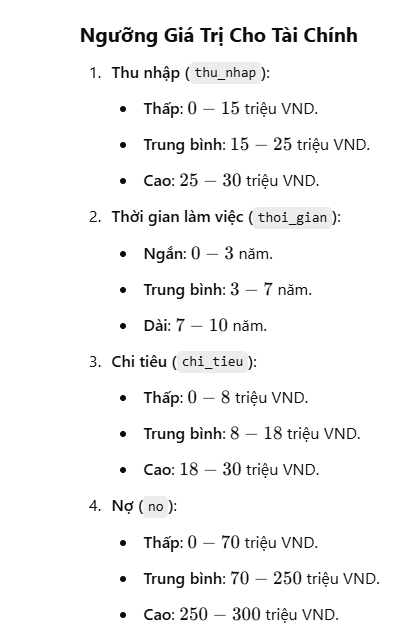

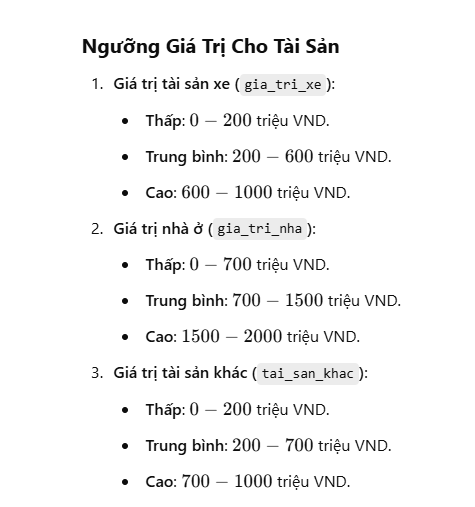